### This Jupyter notebook demonstrates the creation of a simple neural network for educational purposes. The goal is to make the neural network easily interpretable for beginners and help develop a better basic intuition of what complex, thousand-unit multilayer neural networks are doing in a nutshell.



In [12]:
import sys
from pathlib import Path
PROJECT_ROOT = Path.cwd().parent
sys.path.append(str(PROJECT_ROOT))

%load_ext autoreload
%autoreload 2

import numpy as np

from src.data.tiny_digits_5x3 import load_tiny_digits_5x3
from src.viz.digits import show_digit, show_digit_vector, show_filters
from src.nn.manual_feature_net import ManualFeatureNet
from src.nn.mlp import init_mlp, predict_single
from src.nn.train import train_mlp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1) Load data

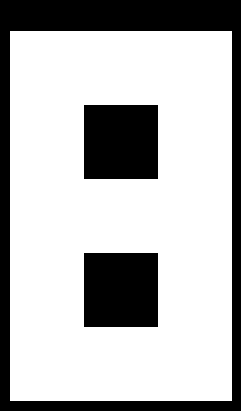

In [13]:
digits, X, y, meta = load_tiny_digits_5x3()
H, W = meta["height"], meta["width"]

show_digit(digits[8], title="Digit 8 (tiny 5x3)")

# 2) Manual interpretable net

Manual predictions:
0 -> 0
1 -> 1
2 -> 8
3 -> 3
4 -> 4
5 -> 5
6 -> 6
7 -> 7
8 -> 8
9 -> 9


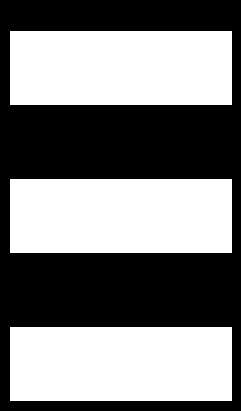

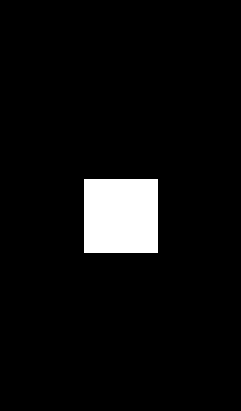

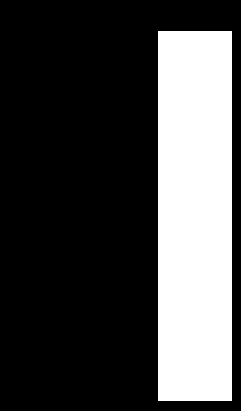

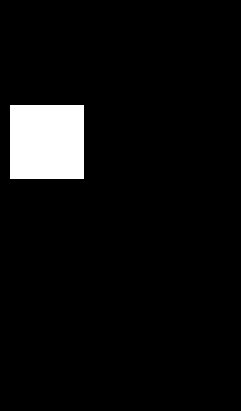

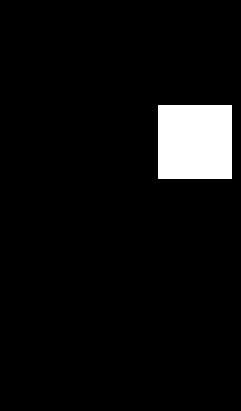

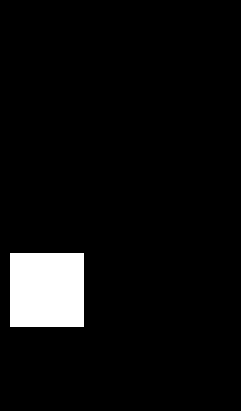

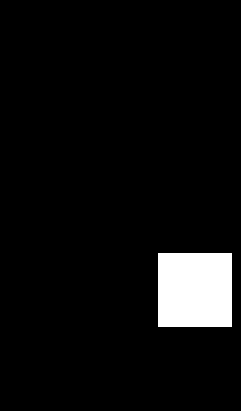

In [ ]:
manual = ManualFeatureNet()

print("Manual predictions:")
for i in range(len(X)):
    print(y[i], "->", manual.predict(X[i]))

# Visualize handcrafted "feature neurons"
hidden_masks = manual.hidden_masks
show_filters(hidden_masks, H, W, titles=[f"mask {i}" for i in range(len(hidden_masks))])

# 3) Learned MLP

In [22]:
params = init_mlp(input_size=H*W, hidden_size=5, output_size=10, seed=42)

print("Before training:")
for i in range(len(X)):
    print(y[i], "->", predict_single(X[i], params))

params = train_mlp(X, y, params, learning_rate=0.1, epochs=300, print_every=25)

print("After training:")
for i in range(len(X)):
    print(y[i], "->", predict_single(X[i], params))

Before training:
0 -> 8
1 -> 9
2 -> 8
3 -> 8
4 -> 0
5 -> 0
6 -> 0
7 -> 9
8 -> 8
9 -> 8
[MLP] Epoch    1 | loss=2.3004 | acc=10.0%
[MLP] Epoch   25 | loss=2.2749 | acc=20.0%
[MLP] Epoch   50 | loss=2.2258 | acc=20.0%
[MLP] Epoch   75 | loss=2.1464 | acc=40.0%
[MLP] Epoch  100 | loss=2.0543 | acc=40.0%
[MLP] Epoch  125 | loss=1.9514 | acc=50.0%
[MLP] Epoch  150 | loss=1.8262 | acc=50.0%
[MLP] Epoch  175 | loss=1.6713 | acc=60.0%
[MLP] Epoch  200 | loss=1.4922 | acc=70.0%
[MLP] Epoch  225 | loss=1.3013 | acc=90.0%
[MLP] Epoch  250 | loss=1.1161 | acc=100.0%
[MLP] Epoch  275 | loss=0.9491 | acc=100.0%
[MLP] Epoch  300 | loss=0.8085 | acc=100.0%
After training:
0 -> 0
1 -> 1
2 -> 2
3 -> 3
4 -> 4
5 -> 5
6 -> 6
7 -> 7
8 -> 8
9 -> 9


# 4) Interpreting learned patterns (weights as "filters")
### Each hidden unit has weights shaped (H,W). Visualize them:

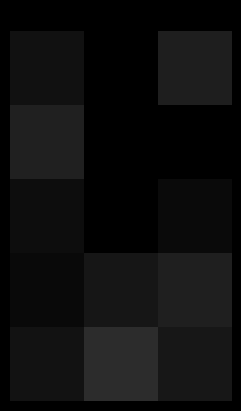

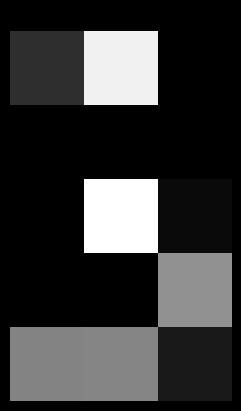

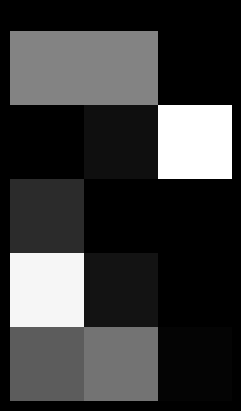

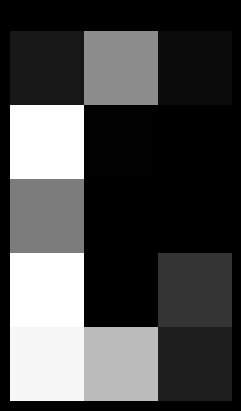

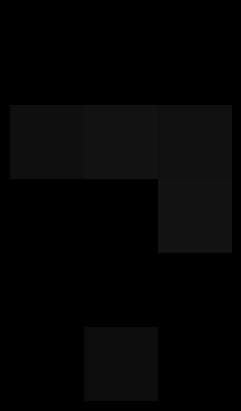

In [23]:
W1 = params["W1"]  # (hidden, 15)
show_filters(W1, H, W, titles=[f"learned unit {i}" for i in range(W1.shape[0])])